<a href="https://colab.research.google.com/github/bhoomireddyvijayakumari/Sales_forecasting-_and_heart_disease_prediction/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 1

##Time Series Analysis

Objective

Analyze sales data over time and forecast future sales using statistical models.

In [32]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Loading data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/task6/sales.csv')

# Convert to datetime and sort
df['Date'] = pd.to_datetime(df['Sale_Date'])
df = df.groupby('Date').sum().sort_index()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


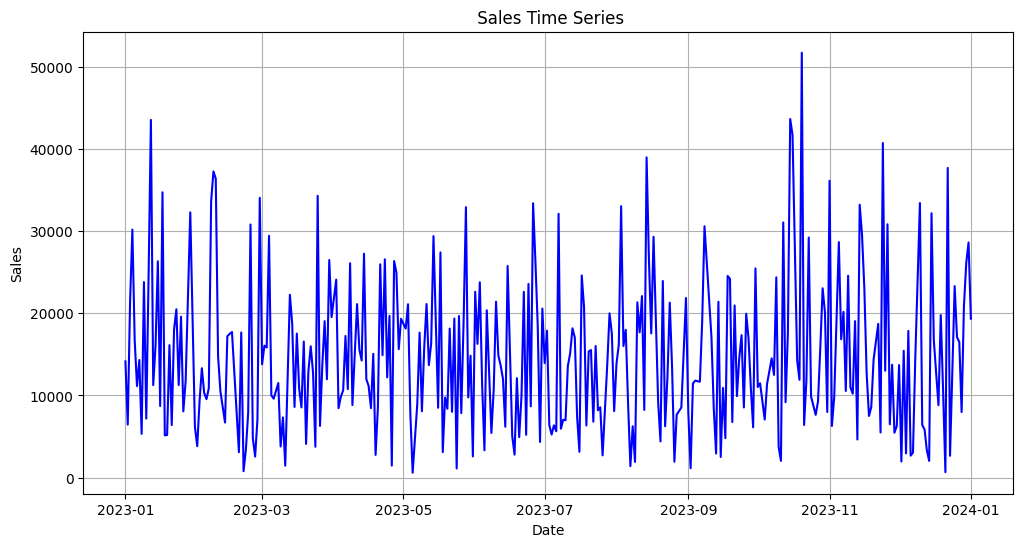

In [18]:
# Visualize
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales_Amount'], label='Sales', color='blue')
plt.title(" Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [41]:
# Train/test split
sales = df['Sales_Amount']
train_size = int(len(sales) * 0.9)
train, test = sales[:train_size], sales[train_size:]

# Fit SARIMA: (p,d,q)(P,D,Q,s)
# Example: (1,1,1)(1,1,1,7) for weekly seasonality
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index
# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100
print(f"SARIMA RMSE: {rmse:.2f}")
print(f"SARIMA MAPE: {mape:.2f}%")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA RMSE: 12177.02
SARIMA MAPE: 246.90%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


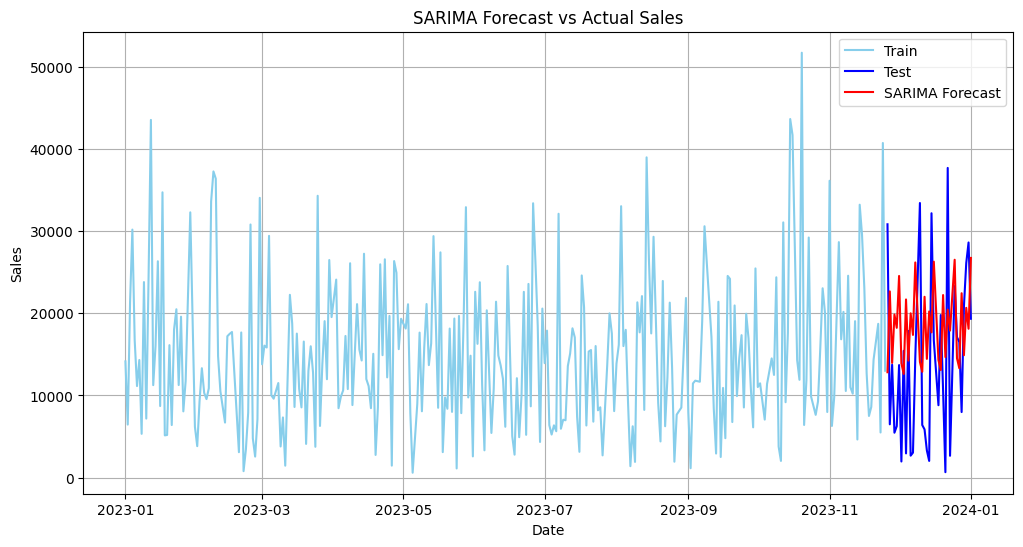

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='skyblue')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(forecast.index, forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.title("SARIMA Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)

##Task 2

#Predicting Heart Disease Using Logistic Regression

Objective

Predict whether a patient has heart disease based on key medical parameters.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/task6/heart_disease.csv.xls')
# Display basic info
print(df.head())
# Drop rows with nulls
df.dropna(inplace=True)


   Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0    Male   39   postgraduate              0         0.0     0.0   
1  Female   46  primaryschool              0         0.0     0.0   
2    Male   48     uneducated              1        20.0     0.0   
3  Female   61       graduate              1        30.0     0.0   
4  Female   46       graduate              1        23.0     0.0   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0              no             0         0    195.0  106.0   70.0  26.97   
1              no             0         0    250.0  121.0   81.0  28.73   
2              no             0         0    245.0  127.5   80.0  25.34   
3              no             1         0    225.0  150.0   95.0  28.58   
4              no             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose Heart_ stroke  
0       80.0     77.0            No  
1       95.0     76.0            No  
2       75.0     70.0     

In [55]:
print(df.isnull().sum())


Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   object 
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   object 
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  Heart_ stroke    3656 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 485.6+ KB
None


In [58]:
# Encode categorical column
if df['Gender'].dtype == 'object':
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


/tmp/ipython-input-312365847.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Heart_ stroke', palette='Set2')


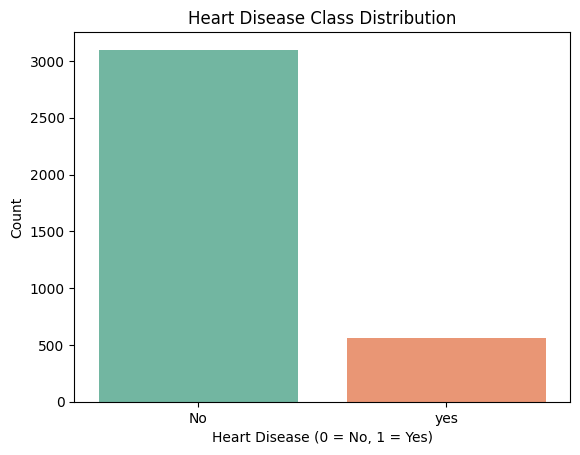

In [62]:
sns.countplot(data=df, x='Heart_ stroke', palette='Set2')
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

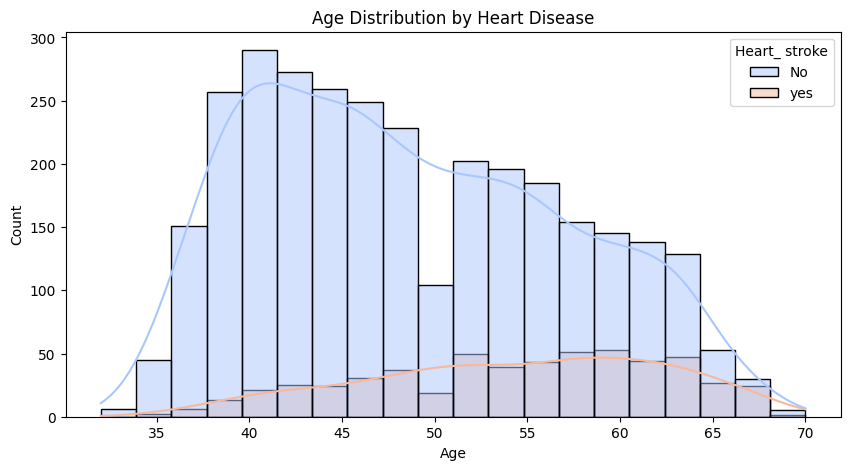

In [65]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='Heart_ stroke', bins=20, kde=True, palette='coolwarm')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.show()


/tmp/ipython-input-1429615579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart_ stroke', y='totChol', palette='coolwarm')


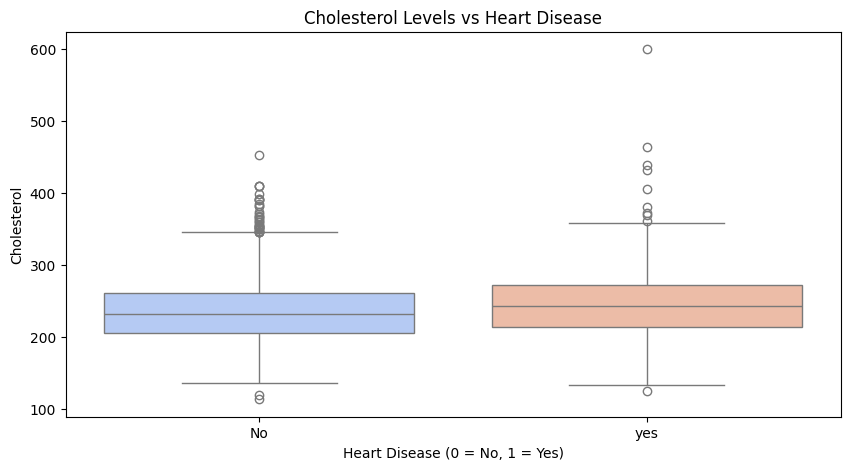

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Heart_ stroke', y='totChol', palette='coolwarm')
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol')
plt.show()


/tmp/ipython-input-2856264785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Heart_ stroke', y='diaBP', palette='pastel')


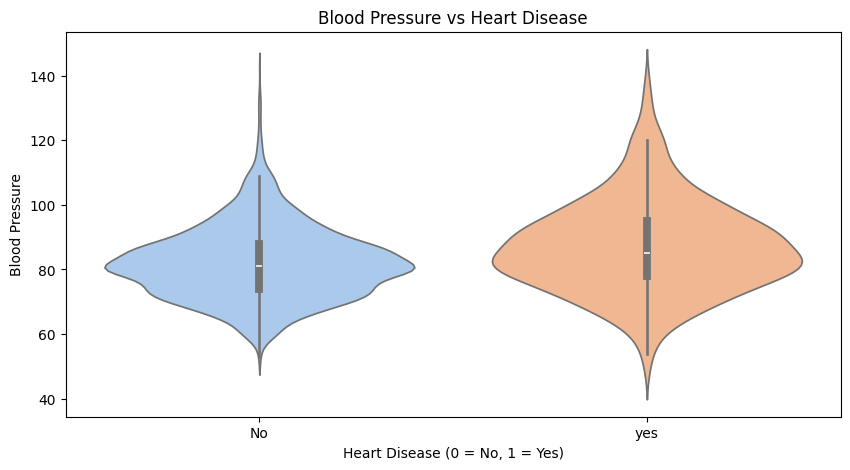

In [69]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Heart_ stroke', y='diaBP', palette='pastel')
plt.title('Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Blood Pressure')
plt.show()


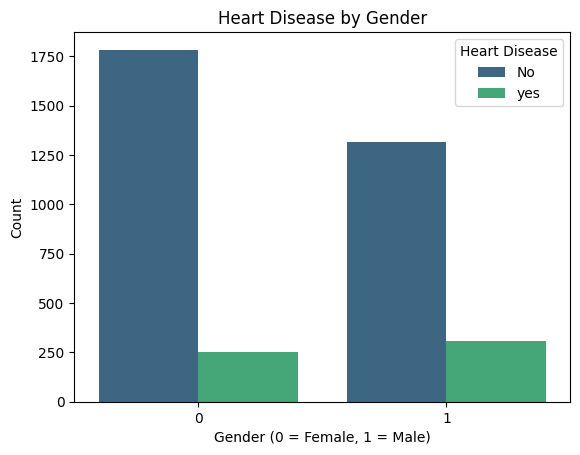

In [70]:
sns.countplot(data=df, x='Gender', hue='Heart_ stroke', palette='viridis')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()


In [73]:
# Features and target
X = df[['age', 'Gender', 'totChol', 'diaBP']]
y = df['Heart_ stroke']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Confusion Matrix:
 [[606   4]
 [120   2]]

Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.99      0.91       610
         yes       0.33      0.02      0.03       122

    accuracy                           0.83       732
   macro avg       0.58      0.50      0.47       732
weighted avg       0.75      0.83      0.76       732



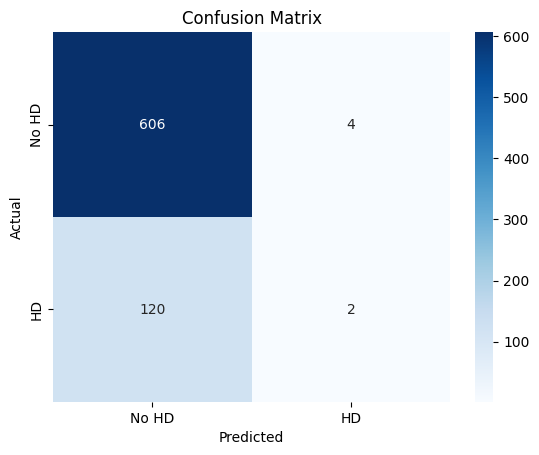

In [74]:
# heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No HD", "HD"], yticklabels=["No HD", "HD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()